In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy

### Data Processing

In [80]:
data = pd.read_csv('data.csv')
x_data = data[['sqft_living', 'sqft_lot', 'sqft_basement']].values
y_data = data['price'].values

In [65]:
x_data
y_data
len(x_data), len(y_data)

(4600, 4600)

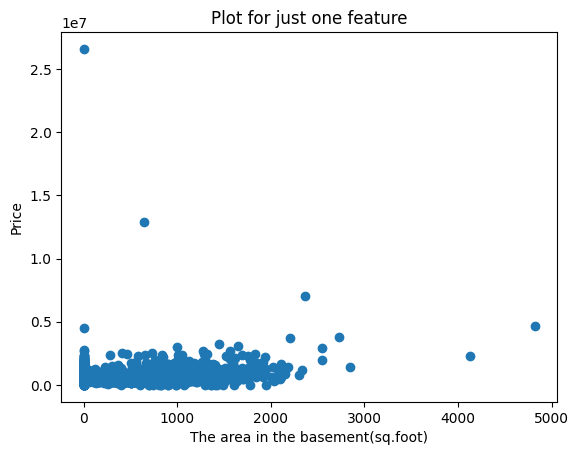

In [66]:
plt.scatter(x_data['sqft_basement'], y_data)
plt.title("Plot for just one feature")
plt.xlabel("The area in the basement(sq.foot)")
plt.ylabel("Price")
plt.show()

### Train

In [23]:
x_data.shape[0]

4600

In [33]:
x_data['bathrooms'][0]
i , j = x_data.shape
i, j

(4600, 10)

In [76]:
def normalize_features(x):
    # Min-Max scaling to normalize features between 0 and 1
    x_normalized = np.zeros_like(x)
    for i in range(x.shape[1]):
        min_val = np.min(x[:, i])
        max_val = np.max(x[:, i])
        x_normalized[:, i] = (x[:, i] - min_val) / (max_val - min_val)
    return x_normalized

In [67]:
def compute_cost(x, y, w, b):
    # n = number of features
    # m = number of examples
    # w = array of slopes gor each feature
    # h_all_features = hypothesis calculated with all features
    
    m, n = x.shape
    cost = 0

    for i in range(m):
        h_all_features = 0
        for j in range(n):
            h_all_features += w[j] * x[i][j]
        h_all_features += b
        cost += ((h_all_features - y[i])**2)  
    
    total_cost = (cost / (2 * m))
    return total_cost


In [78]:
def compute_gradients(x, y, w, b):
    m, n = x.shape
    
    grads = np.zeros((n, ))
    for j in range(0, n):
        for i in range(0, m):
            y_ = 0
            for k in range(0, n):
                y_ += w[k] * x[i][k]
            y_ += b
            grads[j] += (y_ - y[i]) * x[i][j]
        grads[j] /= m
    return grads

In [79]:
def gradient_descent(x, y, w_in, alpha, num_iterations, cost_function, gradient_function):

    w = copy.deepcopy(w_in)
    b = 0 # theta[0] = intercept
    # b = copy.deepcopy(b_in)
    m, n = x.shape

    # cost function evolution - loss
    j_history = []

    for i in range(0, num_iterations):
        grads = gradient_function(x, y, w, b)
        for j in range(0, n):
            w[j] = w[j] - alpha * grads[j]
        b -= alpha * grads[-1]

        j_history.append(cost_function(x, y, w, b))

        #print(f"Iteraton: {i} | Cost: {j_history[i]:.4} | dj_dw: {dj_dw:.4}, | dj_db: {dj_db:.4} | w: {w:.4} | b: {b:.4}")

    return w, j_history

In [99]:
m, n = x_data.shape
x = normalize_features(x_data)
w_in = np.zeros((n, ))
num_iterations = 100
alpha = 1.0e-10
w, j_history = gradient_descent(x, y_data, w_in, alpha, num_iterations, cost_function=compute_cost, gradient_function=compute_gradients)

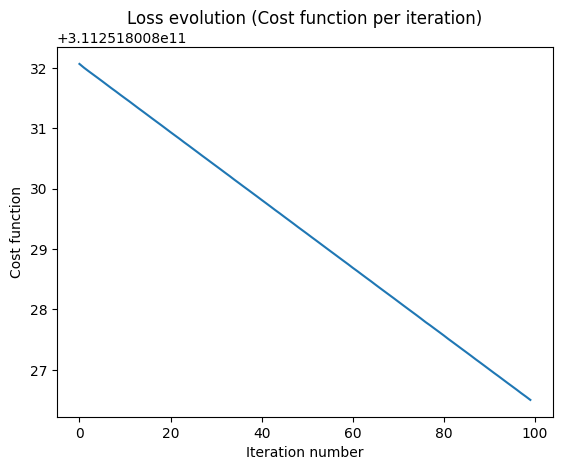

In [100]:
plt.plot(j_history)
plt.title("Loss evolution (Cost function per iteration)")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")
plt.show()